In [1]:
# loading necessary libraries and displaying the dataframe

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df=pd.read_csv('Influencer.csv')
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil


In [2]:
# checking for null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    object 
 4   Avg. Likes           200 non-null    object 
 5   Posts                200 non-null    object 
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    object 
 8   Total Likes          200 non-null    object 
 9   Country Or Region    137 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


In [3]:
# Defining a function to convert thousand, million and billion values into numbers

def convert_to_number(s):
    if s[-1]=='b':
        return float(s[0:-1])*1000000000
    elif s[-1]=='m':
        return float(s[0:-1])*1000000
    elif s[-1]=='k':
        return float(s[0:-1])*1000
    else:
        return int(s)

In [4]:
# Transforming the values from object to numerical

df['Followers']=df['Followers'].apply(lambda x:convert_to_number(x))
df['Avg. Likes']=df['Avg. Likes'].apply(lambda x:convert_to_number(x))
df['Posts']=df['Posts'].apply(lambda x:convert_to_number(x))
df['New Post Avg. Likes']=df['New Post Avg. Likes'].apply(lambda x:convert_to_number(x))
df['Total Likes']=df['Total Likes'].apply(lambda x:convert_to_number(x))

In [5]:
# checking if all the relevant fields are in int or float format

df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485200000.0,8700000.0,3400.0,0.013,6300000.0,2.910000e+10,Spain
1,2,kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5000000.0,5.740000e+10,United States
2,3,\nleomessi,90,363900000.0,6700000.0,915.0,0.010,3500000.0,6.100000e+09,NaN
3,4,\nselenagomez,93,348800000.0,6100000.0,1900.0,0.005,1700000.0,1.140000e+10,United States
4,5,\ntherock,91,339400000.0,1800000.0,6800.0,0.003,932000.0,1.260000e+10,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33600000.0,680600.0,4600.0,0.009,305700.0,3.100000e+09,Russia
196,197,\ndanbilzerian,84,33600000.0,2200000.0,1400.0,0.064,2100000.0,3.000000e+09,Canada
197,198,\nraisa6690,80,33600000.0,227800.0,4200.0,0.003,103200.0,9.559000e+08,Indonesia
198,199,\nluansantana,79,33500000.0,193300.0,865.0,0.003,82600.0,1.672000e+08,Brazil


In [6]:
# dropping the categorical columns and forming new dataframe df2 for correlation analysis

df1=df.drop(['Channel Info'],axis=1)
df1=df1.drop(['Country Or Region'], axis=1)

### 1. Are there any correlated features in the given dataset? If yes, state the correlation coefficient of the pair of features which are highly correlated.

<Axes: >

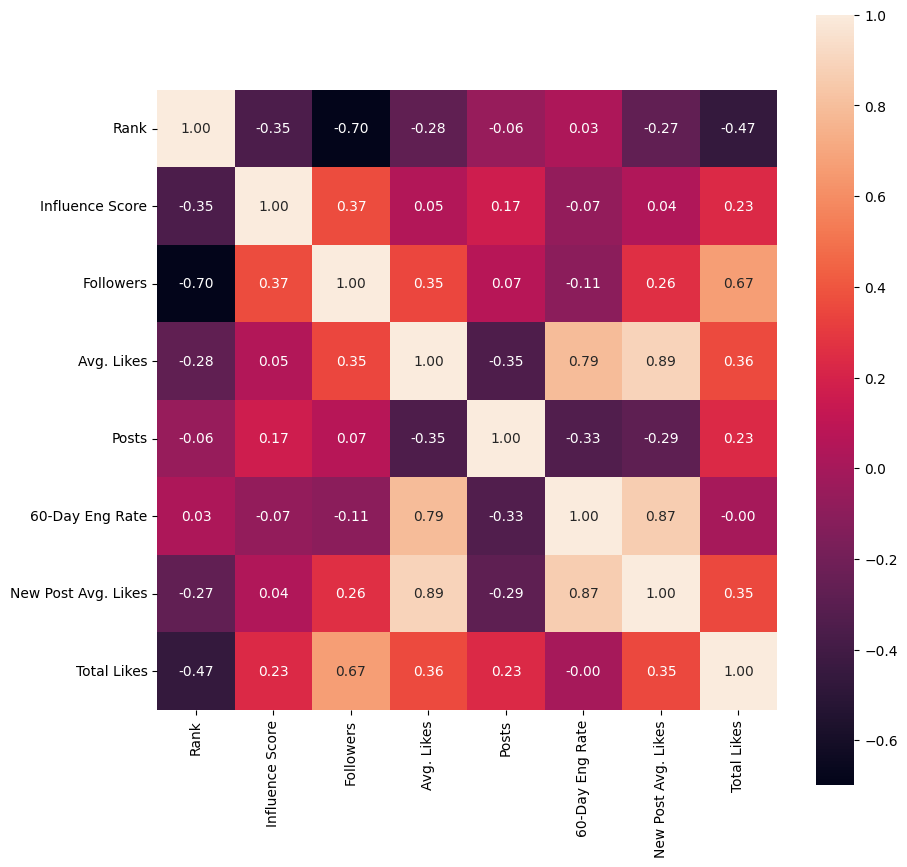

In [7]:
# Plotting the correlation map

correlation=df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,fmt='.2f',square='True',annot=True)

### Some correlations as observed from the table above
#### New Post Avg Likes and Avg Likes are positively correlated with 0.89
#### New Post Avg Likes and 60-Day Eng Rate are positively correlated with 0.87
#### Avg Likes and 60-Day Eng Rate are positively correlated with 0.79
#### Followers and Rank are negatively correlated with score of -0.7
#### Followers and Total likes are positively correlated with score of 0.67
#### Rank and total likes are negatively correlated with score of -0.47

### 2. What is the frequency distribution of the following features?
#### ○ Influence Score
#### ○ Followers
#### ○ Posts

(array([  0.,   0.,   1.,   0.,   4.,   2.,   2.,  33., 140.,  18.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

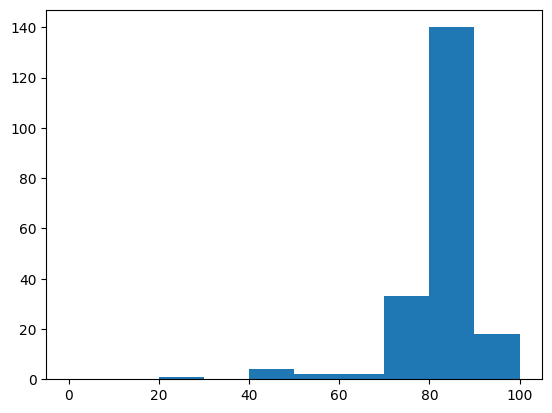

In [19]:
# plotting frequency of influence score

plt.hist(df1['Influence Score'],bins=10,range=(0,100))

In [14]:
# Checking the range of Followers for defining x_label

print(df1['Followers'].min())
print(df1['Followers'].max())

33400000.0
485200000.0


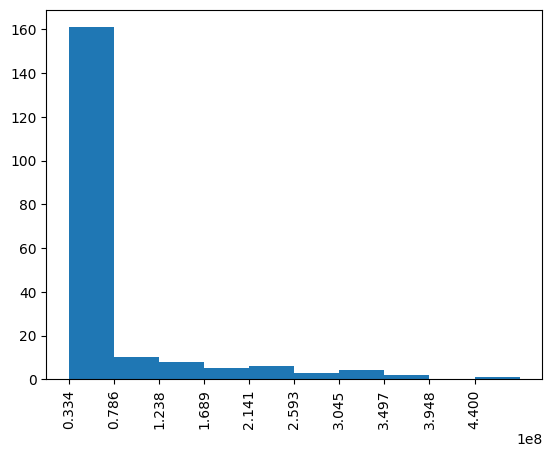

In [18]:
# plotting frequency of followers

fig=plt.hist(df1['Followers'],bins=10)
fig=plt.xticks(np.arange(33400000,485200000,45180000),rotation=90)

In [15]:
# Checking the range of Posts for defining the x_label

print(df1['Posts'].min())
print(df1['Posts'].max())

20.0
16900.0


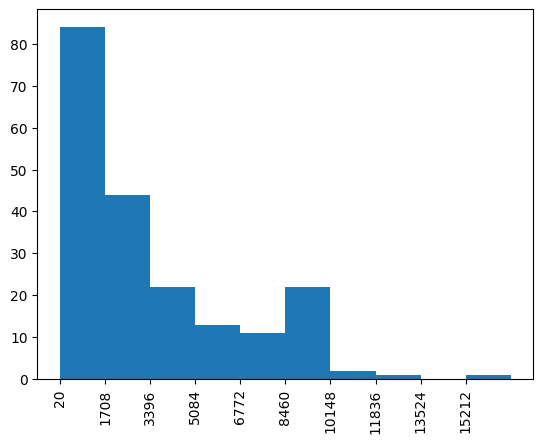

In [17]:
# Plotting the posts

fig=plt.hist(df1['Posts'],bins=10)
fig=plt.xticks(np.arange(20,16900,1688),rotation=90)

### 3. Which country houses the highest number of Instagram Influencers? Please show the count of Instagram influencers in different countries using barchart.

In [22]:
# Checking the number of countries

df2=df.dropna(how='any',axis=0)
df2['Country Or Region'].unique()

array(['Spain', 'United States', 'Canada', 'Brazil', 'Netherlands',
       'United Kingdom', 'India', 'Uruguay', 'Turkey', 'Indonesia',
       'Colombia', 'France', 'Australia', 'Italy', 'United Arab Emirates',
       'Puerto Rico', "CÃ´te d'Ivoire", 'Anguilla', 'Switzerland',
       'Sweden', 'British Virgin Islands', 'Czech Republic', 'Mexico',
       'Germany', 'Russia'], dtype=object)

In [26]:
# Forming a list of frequency of occurances of the countries in order

frequency_list=[]
for i in df2['Country Or Region'].unique().tolist():
    frequency_list.append(df2['Country Or Region'].to_list().count(i))   

[5, 65, 3, 13, 2, 4, 12, 1, 2, 7, 3, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1]


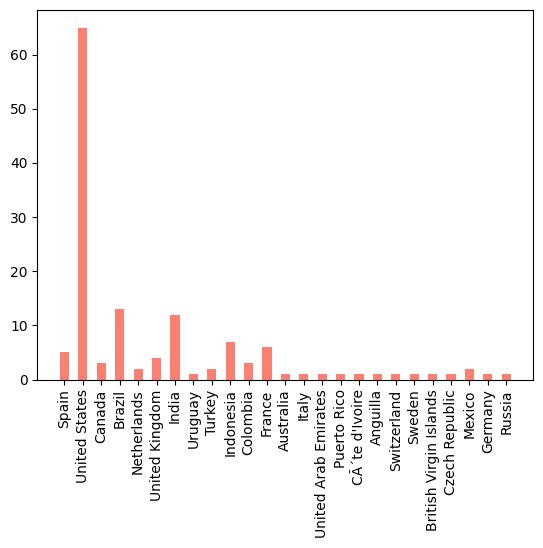

In [29]:
# plotting the required bar graph

plt.bar(df2['Country Or Region'].unique().tolist(),frequency_list,color='salmon',width=0.5)
fig=plt.xticks(rotation=90)

### 4. Who are the top 10 influencers in the given dataset based on the following features
#### ● Followers
#### ● Average likes
#### ● Total Likes

In [64]:
# Displaying the names of the top 10 Followers

df.sort_values(by=['Followers'],ascending=False,axis=0).head(10)[['Channel Info','Followers']]

,Channel Info,Followers
0,\ncristiano,485200000.0
1,kyliejenner,370700000.0
2,\nleomessi,363900000.0
3,\nselenagomez,348800000.0
4,\ntherock,339400000.0
5,\narianagrande,333000000.0
6,\nkimkardashian,330700000.0
7,\nbeyonce,276100000.0
8,\nkhloekardashian,273900000.0
9,\njustinbieber,260000000.0


In [65]:
# Displaying the names of the top 10 'New Post Avg. Likes'

df.sort_values(by=['New Post Avg. Likes'],ascending=False,axis=0).head(10)[['Channel Info','New Post Avg. Likes']]

,Channel Info,New Post Avg. Likes
96,\nthv,12900000.0
131,\nj.m,10000000.0
54,\ntomholland2013,7900000.0
22,\nzendaya,7500000.0
38,\nlalalalisa_m,7200000.0
25,\nbadgalriri,6900000.0
165,\nrkive,6500000.0
0,\ncristiano,6300000.0
138,\nbadbunnypr,5500000.0
49,\njennierubyjane,5400000.0


In [66]:
# Displaying the names of the top 10 Total Likes

df.sort_values(by=['Total Likes'],ascending=False,axis=0).head(10)[['Channel Info','Total Likes']]

,Channel Info,Total Likes
1,kyliejenner,5.740000e+10
0,\ncristiano,2.910000e+10
22,\nzendaya,2.080000e+10
6,\nkimkardashian,1.980000e+10
5,\narianagrande,1.850000e+10
25,\nbadgalriri,1.800000e+10
19,\nneymarjr,1.440000e+10
9,\njustinbieber,1.400000e+10
16,\nnickiminaj,1.290000e+10
4,\ntherock,1.260000e+10


### 5. Describe the relationship between the following pairs of features using a suitable graph
#### ● Followers and Total Likes
#### ● Followers and Influence Score
#### ● Posts and Average likes
#### ● Posts and Influence Score

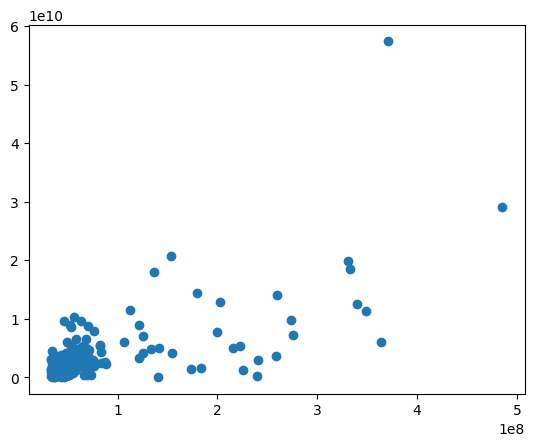

In [67]:
# correlation is 0.67

plt.scatter(df['Followers'],df['Total Likes'])

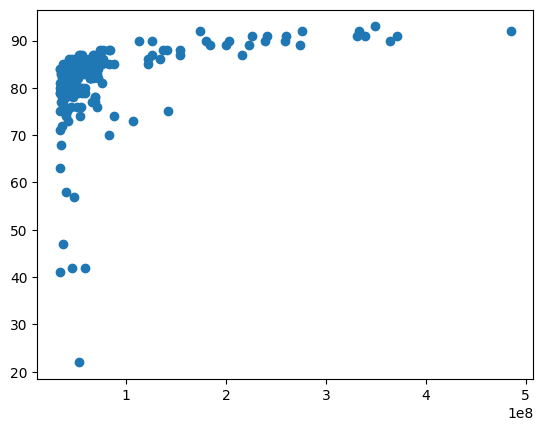

In [68]:
# correlation is 0.37

plt.scatter(df['Followers'],df['Influence Score'])

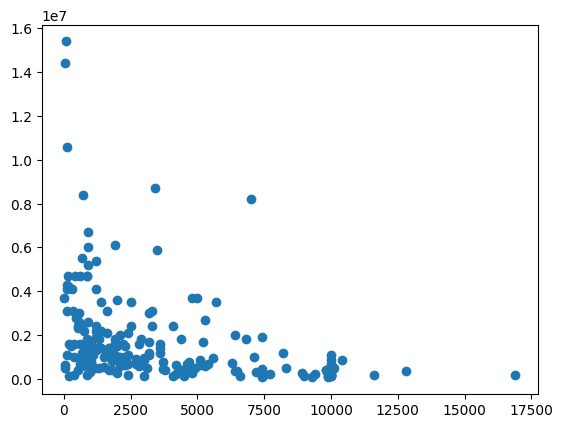

In [69]:
# correlation score -0.35

plt.scatter(df['Posts'],df['Avg. Likes'])

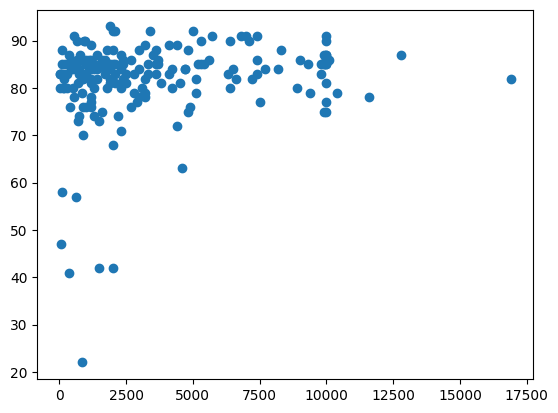

In [70]:
# correlation score 0.17

plt.scatter(df['Posts'],df['Influence Score'])